In [235]:
%matplotlib inline     
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import matplotlib
import matplotlib.animation as animation
import  matplotlib.pyplot
from random import randint
import math
import numpy

dict_test = { "plastique" : 0,  
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

dict_eboueur = { "plastique" : 0,  
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

dictionaire_dechet_repartition = { "plastique" : 0.28, 
     "verre" : 0.11,
     "papier" : 0.18,
     "metal" : 0.11,
     "dechets organiques " : 0.19,
     "batteries" : 0.07,
     "ampoule" : 0.0501 }

# Dictionaire définissant la répartition dans un Flux donné soit les probabilités à Utiliser.
# Dictionnaire pour avoir le nombre de fois tiré ce type de déchet propre.
dictionaire_nombre_dechet = { "plastique" : 0,  
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

dictionaire_nombre_dechet_bonne_poubelles = { "plastique" : 0,  
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

dictionaire_nombre_dechet_mauvaise_poubelles = { "plastique" : 0,
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

dictionaire_taille = { "plastique" : 0,
     "verre" : 0,
     "papier" : 0,
     "metal" : 0,
     "dechets organiques " : 0,
     "batteries" : 0,
     "ampoule" : 0 }

# Initialement NULL en cm.

In [236]:
def def_taille_poubelle(df): #FIXE ! PAS DE CHANGEMENT !
    for d in df:
        var = random.randint(100,400)
        df[d]=var
    return df

# Instaure une random Taille aux poubelles comprises entre 100 et 400 cm.

def_taille_poubelle(dictionaire_taille)

{'plastique': 186,
 'verre': 396,
 'papier': 157,
 'metal': 209,
 'dechets organiques ': 223,
 'batteries': 151,
 'ampoule': 352}

In [237]:
def vérification_somme_egale_1(D):
    ss = 0.0
    for d in D:
        ss += D[d]
    if(ss==1):
        return True
    else:
        p = 1-ss
        for k in D:
            if (k=='ampoule'):
                D[k]+=p
                
# Répare le probleme de l'ordinateur qui ne connait pas que la somme est égale à 1 car chiffre décimale .

vérification_somme_egale_1(dictionaire_dechet_repartition)




In [238]:
def change_si_90_dans_la_poubelle(d_nombre_dechet,dechet,dtaille):
    
    a = False
    taille = 0
    nb_dedans = 0
    for k in dtaille:
        if(k==dechet): # on trouve la poubelle
            taille=dtaille[k] # on prend la taille de la poubelle choisie
            
    for k in d_nombre_dechet: #dictionnaire avec le nb_de_dechets dans la poubelle
        if(k==dechet):# on cherche la poubelle
            nb_dedans =d_nombre_dechet[k] # on prend le nombre de déchet déjà dans cette poubelle
            
    if(nb_dedans>(0.9*taille)): #le nombre de déchets dépasse 90% de la taille de la poubelle.
       a = True
        
    return a #Renvoie si oui 90% est dépassé ou pas.





In [239]:
def dechet_choisis(d):
    r = random.random()
    s = 0.0
    for k in d.keys():
        s += d[k]
        if r <= s:
            return k
        
#On choisit le déchet de facon aléatoire.

def poubelle_choisie(nom_du_dechet,dict_bon_dechet,dict_mauvais_dechet):
    
    var = random.random() #Tire un aléatoirement une proba pour savoir le mettre dans la bonne ou pas 
    # La personne responsable du Flux , va choisir de la mettre dans la bonne ou mauvaise poubelle.
    indicateur = change_si_90_dans_la_poubelle(dictionaire_nombre_dechet,nom_du_dechet,dictionaire_taille)
    #On utilise deux dictionnaire non passés en paramètre !
    
    if (indicateur == True): #Poubelle pour ce déchet à dépasser 90%
        # On le met directement dans la mauvaise poubelle
        dict_mauvais_dechet[nom_du_dechet]+=1
        dictionaire_nombre_dechet[nom_du_dechet]+=1
        
    else: # Poubelle pour ce déchet pas encore à 90% 
        if(var<=0.7): # 70% de le mettre dans la bonne et 30% de la mettre dans la mauvaise
            dict_bon_dechet[nom_du_dechet]+=1
            dictionaire_nombre_dechet[nom_du_dechet]+=1

            
        else: # On le met dans la mauvaise poubelle 30% de la mauvaise.
            dict_mauvais_dechet[nom_du_dechet]+=1
            dictionaire_nombre_dechet[nom_du_dechet]+=1

    return 






In [240]:
def eboueur(diction_nombre_dechet,dict_taille,dict_eboueur):
    #l'eboueur vide toutes les poubelles dépassant >= 90% de leurs taille !
    for k in diction_nombre_dechet:
        if ((change_si_90_dans_la_poubelle(diction_nombre_dechet,k,dict_taille)) == True):
            dict_eboueur[k]+= diction_nombre_dechet[k]
            diction_nombre_dechet[k]=0
             #on rajoute le nombre initational dans le dict ebouer qui nous permettra la vérification finale pour le Plot !
    return 


In [241]:
def flux():
    dechet = dechet_choisis(dictionaire_dechet_repartition) #On tire notre déchet
    if (vérification_somme_egale_1(dictionaire_dechet_repartition) == False):
        exit(EXIT_FAILURE) # Verification System pour pas avoir l'erreur Flotant 
    else:
        # C'est au tour de choisir une poubelle
        poubelle_choisie(dechet,dictionaire_nombre_dechet_bonne_poubelles,dictionaire_nombre_dechet_mauvaise_poubelles)


In [252]:
def testeur_bon_fonctionnement_system():
    key = True
    s = 0
    p = 0
    #On verifie que la somme donne bien la somme attendu.
    for k in dictionaire_nombre_dechet_bonne_poubelles: #Prend le premier élement du dict
        s = dictionaire_nombre_dechet_bonne_poubelles[k] 
        # Fait de même pour les mauvais
        s += dictionaire_nombre_dechet_mauvaise_poubelles[k] #On rajoute les mauvais
        # Fait de même pour le nb totale dans éboueur pour le dechet type et le nombre de déchets dans la poubelle normale qui reste en exécution.
        p = dict_eboueur[k]
        p += dictionaire_nombre_dechet[k]
        if(p!=s):
            key = False
    return key

def n_flux(n,k):
    # k correspond à la variable permettant l'optimation 
    #On fait tourner n fois Flux() et on print les dicos
    for i in range(0,n):
        
        if(n%k==0): # si n est un multiple de 10 bien cela fait passer l'eboueur
            # Cas simple
            
            eboueur(dictionaire_nombre_dechet,dictionaire_taille,dict_eboueur)
    
        flux()
    if(testeur_bon_fonctionnement_system() == False):
        print("ERROR")#ERROR DANS LES DICO CAR LA SOMME N EST PAS LA BONNE!!!
    return 

def remet_dico_a_zero():
    for k in dictionaire_nombre_dechet:
        dictionaire_nombre_dechet[k]=0
        dict_eboueur[k]=0
        dictionaire_nombre_dechet_bonne_poubelles[k]=0
        dictionaire_nombre_dechet_mauvaise_poubelles[k]=0
        

        # Taille reste fixe car sinon fait echoue l'expérience. 
        # Remet tous les dicos à 0 afin de permettre de tourner l'expérience sans avoir de mémoire.

def optimisation_version_final(n):
    #on part du principe que 10.000 flux
    
    # on part du principe que l'eboueur passe chaque entre [100] et [200] par cent.
    epsilon = 100  #on va tester 100 , 200 , 300 ... jusqu'à [5000] cela voudrait dire qu'il passe 2 fois. 
    dic_fin = dict()
    remet_dico_à_zero() #remet tout à zéro pour pas avoir de problèmes.
    i = 100
    
    while(epsilon<=n):
        somme_eboueur = 0 # on cherche à évaluer l'efficacité de l'eboueur
        n_flux(10000,epsilon)#on décide de faire  tourner 10.000 fois pour notre relevé statistique.
        for d in dict_eboueur:
            somme_eboueur += dict_eboueur[d]
        dic_fin[i]=somme_eboueur # Nombre de déchet que l'eboueur à jeter.
        i+=100
        epsilon += 100
        remet_dico_à_zero()

    return dic_fin
        
optimisation_version_final(5000) # 2 fois

#Plus l'intervale est grand moins l'eboueur travaille.

# Faire tourner minimum à 500 n'a pas de sens car trop peu les poubelles ne sont pas remplis
# Les éboueurs ont des coups et on cherche à minimiser le cout de passage pour l'administration.
# pour Epsilon = 3000 le meilleur moment est que l'eboueur passe chaque 12 fois.
# on  peut dire que le passage dans un intervalle de 10 n'a pas d'impact se qui réduit nos calcul /10 car on fait tourner un assez grand nombre de fois.
# on part du principe que l'optimisation à un  coup pour l'administration.



{100: 9214,
 200: 9389,
 300: 0,
 400: 9356,
 500: 9214,
 600: 0,
 700: 0,
 800: 0,
 900: 0,
 1000: 9214,
 1100: 0,
 1200: 0,
 1300: 0,
 1400: 0,
 1500: 0,
 1600: 0,
 1700: 0,
 1800: 0,
 1900: 0,
 2000: 9214,
 2100: 0,
 2200: 0,
 2300: 0,
 2400: 0,
 2500: 9052,
 2600: 0,
 2700: 0,
 2800: 0,
 2900: 0,
 3000: 0,
 3100: 0,
 3200: 0,
 3300: 0,
 3400: 0,
 3500: 0,
 3600: 0,
 3700: 0,
 3800: 0,
 3900: 0,
 4000: 0,
 4100: 0,
 4200: 0,
 4300: 0,
 4400: 0,
 4500: 0,
 4600: 0,
 4700: 0,
 4800: 0,
 4900: 0,
 5000: 8999}

In [253]:
def graphic_plot(dic):
    nb=[]
    nom=[]
    for d in dic:
        nb.append(dic[d])
    for d in dic:
        nom.append(d)
    plt.figure()
    plt.plot(nb,nom)
    plt.xlabel("Nombre de déchets dans la poubelle")
    plt.ylabel("Nom de la poubelle")
    plt.show()
    return 

def graphic_plot_dic_bonne(dic):
    nb=[]
    nom=[]
    for d in dic:
        nb.append(dic[d])
    for d in dic:
        nom.append(d)
    plt.figure()
    plt.plot(nb,nom)
    plt.xlabel("Nombre de bon déchets dans la poubelle")
    plt.ylabel("Nom de la poubelle")
    plt.show()
    return   

def graphic_plot_dic_mauvaise(dic):
    nb=[]
    nom=[]
    for d in dic:
        nb.append(dic[d])
    for d in dic:
        nom.append(d)
    plt.figure()
    plt.plot(nb,nom)
    plt.xlabel("Nombre de mauvais déchets dans la poubelle")
    plt.ylabel("Nom de la poubelle")
    plt.show()
    return 

def batonnets_plot(dic):
    nb=[]
    nom=[]
    for d in dic:
        nb.append(dic[d])
    for d in dic:
        nom.append(d)
    plt.figure()
    plt.bar(nom,nb)
    plt.xticks(rotation=40)
    plt.xlabel("Type de la poubelle")
    plt.ylabel("Nombre de déchets dans la poubelle")
    plt.show()
    return


def camenbert(dic):
    nom = []
    nb = []
    for d in dic:
        nb.append(dic[d])
    for d in dic:
        nom.append(d)
    x = nb
    plt.figure(figsize = (8, 8))
    plt.pie(x, labels = nom,
           autopct = lambda x : str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1)

    plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
    return 

def dic_final(nom):
    dict_fin = dict()
    dict_fin["BONNE"] = dictionaire_nombre_dechet_bonne_poubelles[nom]
    dict_fin["MAUVAIS"] = dictionaire_nombre_dechet_mauvaise_poubelles[nom]
    return dict_fin
    
    
def camembert(nom):
    name = []
    nb = []
    do = dic_final(nom)
    for d in do:
        nb.append(do[d])
    for d in do:
        name.append(d)
    x = nb
    plt.figure(figsize = (8,8))
    plt.pie(x, labels = name,
           autopct = lambda x : str(round(x,2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1)
    plt.legend(bbox_to_anchor=(1,1),
              bbox_transform=plt.gcf().transFigure)
    plt.title("Poubelle de " + nom)
    

    
def touslescam():
    for nom in dictionaire_nombre_dechet:
        camembert(nom)
    


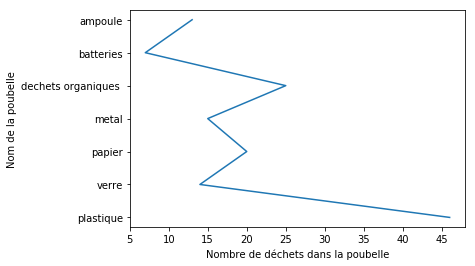

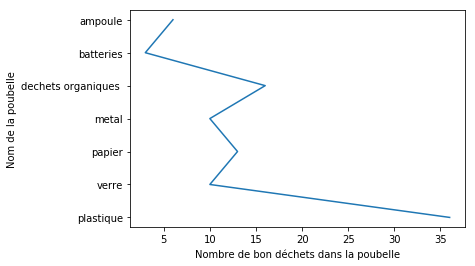

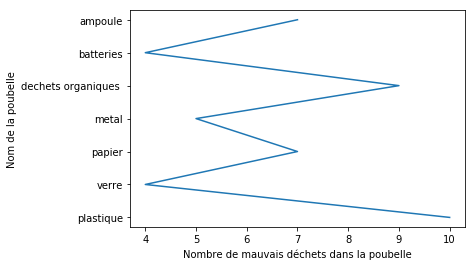

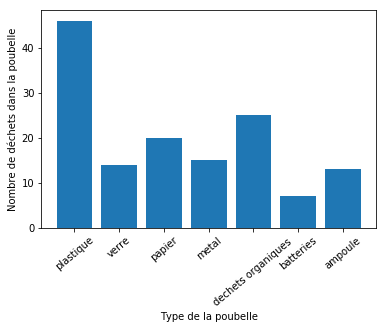

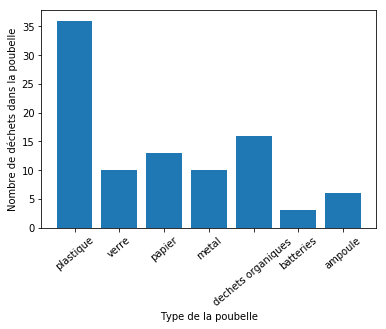

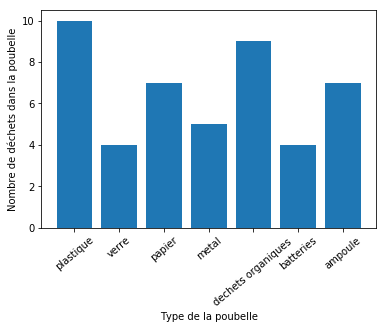

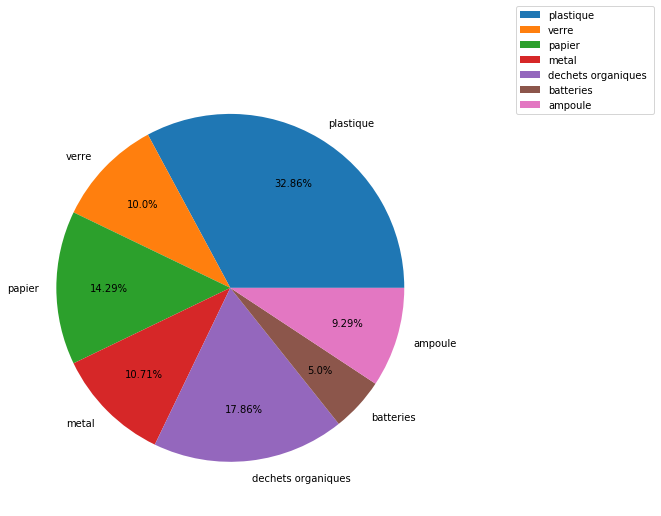

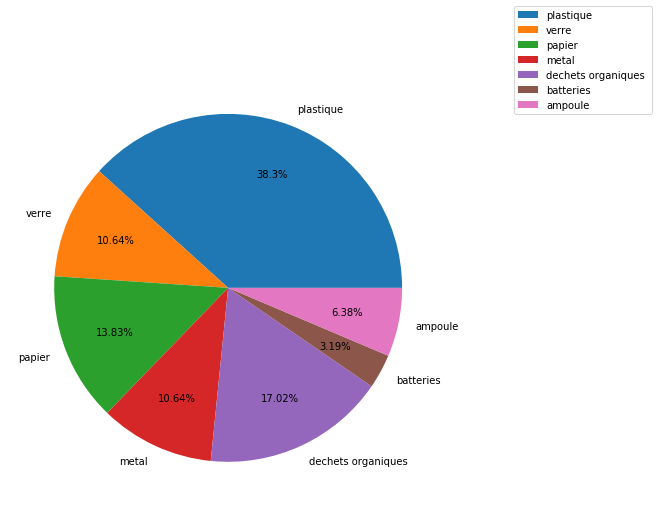

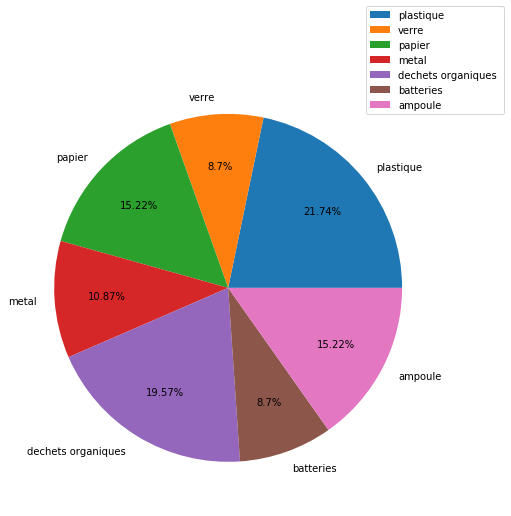

In [256]:
def graphique():
    #Fait l'appel au Graphique !
    
    graphic_plot(dictionaire_nombre_dechet)
    graphic_plot_dic_bonne(dictionaire_nombre_dechet_bonne_poubelles)
    graphic_plot_dic_mauvaise(dictionaire_nombre_dechet_mauvaise_poubelles)
    batonnets_plot(dictionaire_nombre_dechet)
    batonnets_plot(dictionaire_nombre_dechet_bonne_poubelles)
    batonnets_plot(dictionaire_nombre_dechet_mauvaise_poubelles)
    camenbert(dictionaire_nombre_dechet)
    camenbert(dictionaire_nombre_dechet_bonne_poubelles)
    camenbert(dictionaire_nombre_dechet_mauvaise_poubelles)

    return

graphique()


plastique : 36
verre : 10
papier : 13
metal : 10
dechets organiques  : 16
batteries : 3
ampoule : 6
plastique : 10
verre : 4
papier : 7
metal : 5
dechets organiques  : 9
batteries : 4
ampoule : 7


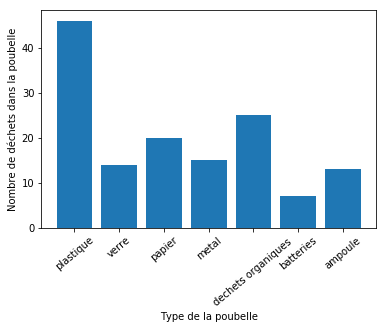

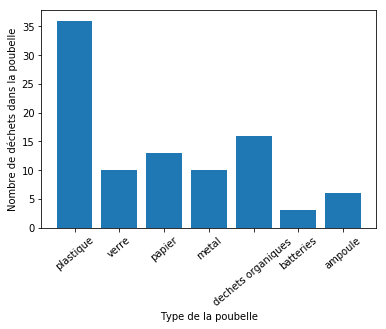

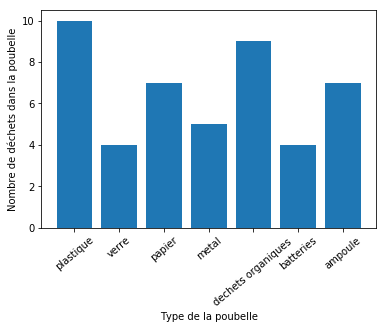

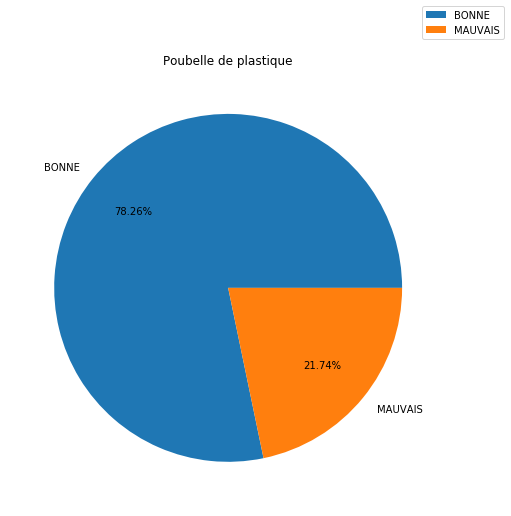

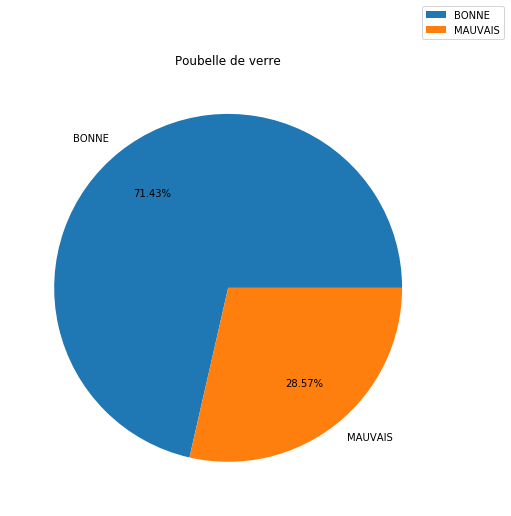

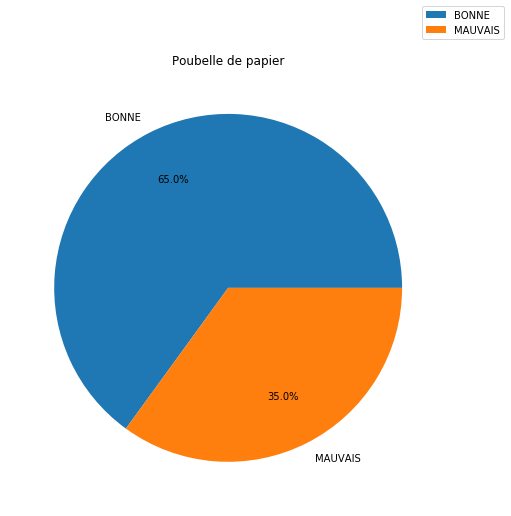

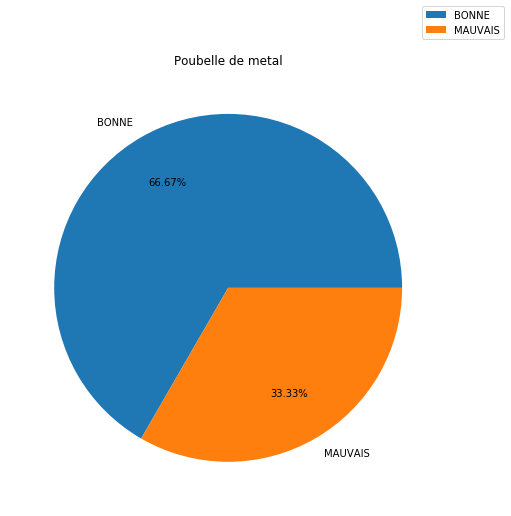

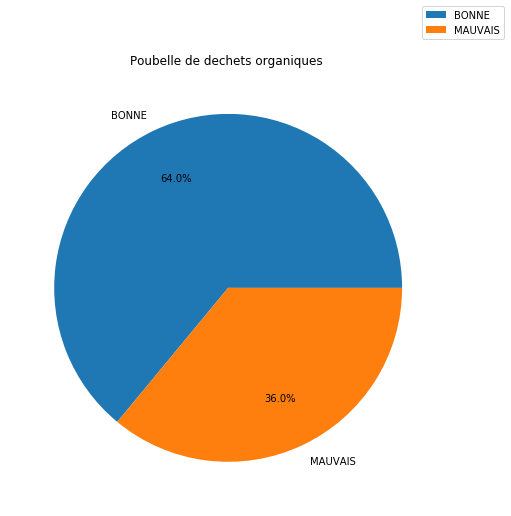

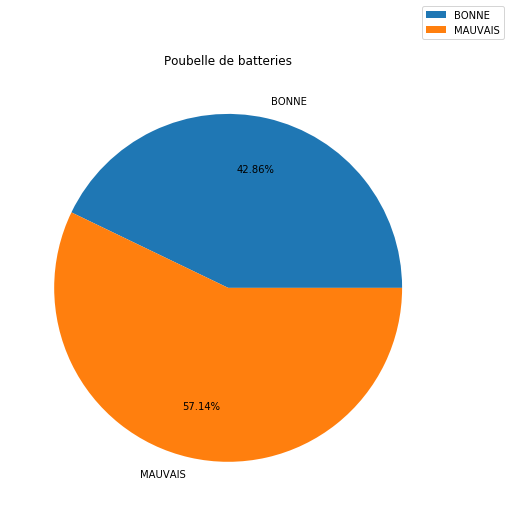

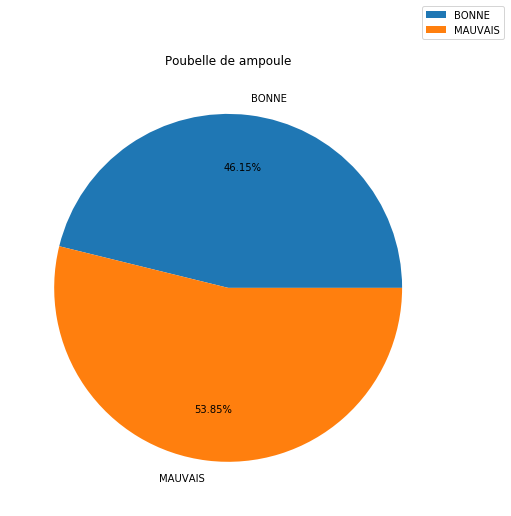

In [255]:
remet_dico_a_zero()
n_flux(140,150)
for cle,valeur in dictionaire_nombre_dechet_bonne_poubelles.items():
    print (cle ,':',valeur)

for cle,valeur in dictionaire_nombre_dechet_mauvaise_poubelles.items():
    print(cle, ':', valeur)
batonnets_plot(dictionaire_nombre_dechet)
batonnets_plot(dictionaire_nombre_dechet_bonne_poubelles)
batonnets_plot(dictionaire_nombre_dechet_mauvaise_poubelles)
touslescam()